In [0]:
# Import the numpy and pandas package
import pandas as pd
import numpy as np
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker
import sklearn


In [82]:
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [0]:
#read file and display the top 5 records
#filepath = "E:\\ML\\ML Alg\\linearRegression -Assignment\\CarPrice_Assignment.csv"
import io
carinfo  = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))
#carinfo = pd.read_csv(filepath)
carinfo.head(5)
carinfo_df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [166]:
carinfo.shape

(205, 26)

In [85]:
#Totol Rows in data = 205, Columns = 26 columns
#Checking Duplicate Rows
carinfodup = carinfo[carinfo.duplicated()]
carinfodup.shape

(0, 26)

In [0]:
#no duplicaterecords

In [86]:
#Checking for null values
#loan.count()
100*carinfo.isnull().sum()/carinfo.shape[0],2

(car_ID              0.0
 symboling           0.0
 CarName             0.0
 fueltype            0.0
 aspiration          0.0
 doornumber          0.0
 carbody             0.0
 drivewheel          0.0
 enginelocation      0.0
 wheelbase           0.0
 carlength           0.0
 carwidth            0.0
 carheight           0.0
 curbweight          0.0
 enginetype          0.0
 cylindernumber      0.0
 enginesize          0.0
 fuelsystem          0.0
 boreratio           0.0
 stroke              0.0
 compressionratio    0.0
 horsepower          0.0
 peakrpm             0.0
 citympg             0.0
 highwaympg          0.0
 price               0.0
 dtype: float64, 2)

In [87]:
#display the summary of the file for preliminary analysis
carinfo.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [167]:
#DataCleaning Steps
#Removing model name from car company name
carinfo[['CarCompany','Model']] = carinfo['CarName'].str.split(' ', n=1, expand=True)
del carinfo['CarName']
carinfo.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [90]:
#display the unique  category valyes of the file for preliminary analysis
print('enginelocation -')
print(carinfo.enginelocation.unique())
print('aspiration -')
print(carinfo.aspiration.unique())
print('carbody -')
print(carinfo.carbody.unique())
print('drivewheel -')
print(carinfo.drivewheel.unique())
print('peakrpm -')
print(carinfo.peakrpm.unique())
print('symboling -')
print(carinfo.symboling.unique())
print('fueltype -')
print(carinfo.fueltype.unique())
print('aspiration -')
print(carinfo.aspiration.unique())
print('doornumber -')
print(carinfo.doornumber.unique())
print('CarCompany -')
print(carinfo.CarCompany.unique())
print('enginetype -')
print(carinfo.enginetype.unique())

enginelocation -
['front' 'rear']
aspiration -
['std' 'turbo']
carbody -
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel -
['rwd' 'fwd' '4wd']
peakrpm -
[5000 5500 5800 4250 5400 5100 4800 6000 4750 4650 4200 4350 4500 5200
 4150 5600 5900 5750 5250 4900 4400 6600 5300]
symboling -
[ 3  1  2  0 -1 -2]
fueltype -
['gas' 'diesel']
aspiration -
['std' 'turbo']
doornumber -
['two' 'four']
CarCompany -
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
enginetype -
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [168]:
# correct the car company names -  'toyota' 'toyouta' , 'vokswagen' 'volkswagen' 'vw' 'maxda' 'mazda'  'Nissan' 'nissan'
#'porsche' 'porcshce' 
# overwriting column with replaced value of correct car company names
carinfo["CarCompany"]= carinfo["CarCompany"].replace("maxda", "mazda") 
carinfo["CarCompany"]= carinfo["CarCompany"].replace("toyouta", "toyota") 
carinfo["CarCompany"]= carinfo["CarCompany"].replace("vokswagen", "volkswagen") 
carinfo["CarCompany"]= carinfo["CarCompany"].replace("vw", "volkswagen") 
carinfo["CarCompany"]= carinfo["CarCompany"].replace("Nissan", "nissan") 
carinfo["CarCompany"]= carinfo["CarCompany"].replace("porcshce", "porsche") 
print('CarCompany -')
print(carinfo.CarCompany.unique())

CarCompany -
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [169]:
# drop car_ID column
del carinfo['car_ID']
carinfo.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [94]:
#identify the company sold highest
carinfo.CarCompany.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarCompany, dtype: int64

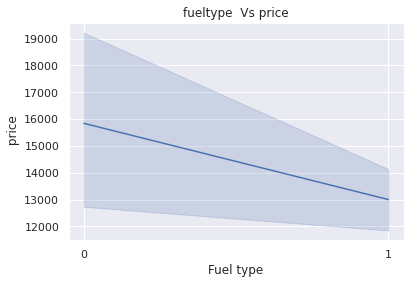

In [95]:
#univariate fueltype vs price
sns.lineplot(x='fueltype', y='price', data=carinfo)
plt.title('fueltype  Vs price')
plt.xlabel('Fuel type')
plt.ylabel(' price')
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

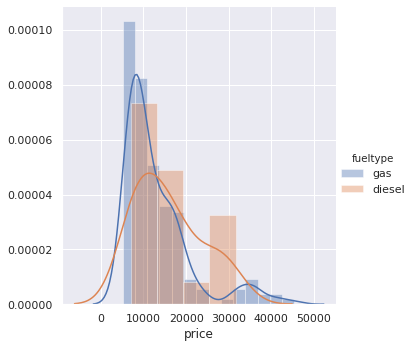

In [96]:
sns.FacetGrid(carinfo,hue='fueltype',size=5).map(sns.distplot,'price').add_legend()

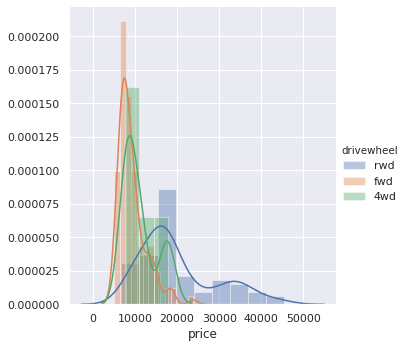

In [97]:
#Segmented Univariate Analysis
sns.FacetGrid(carinfo,hue='drivewheel',size=5).map(sns.distplot,'price').add_legend()

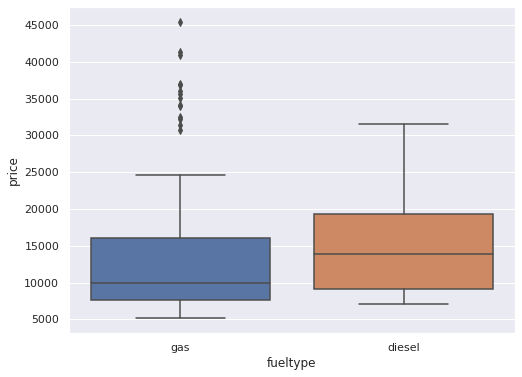

In [98]:
#Bivariate analysis
var = 'fueltype'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

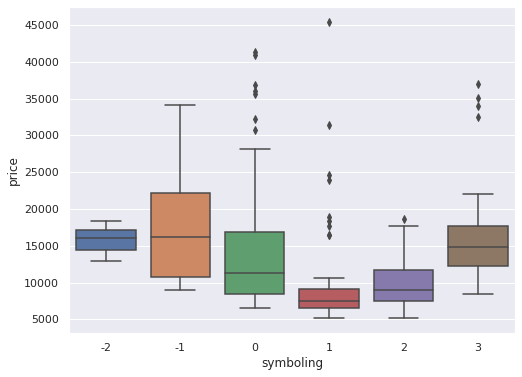

In [99]:
#Bivariate analysis
var = 'symboling'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

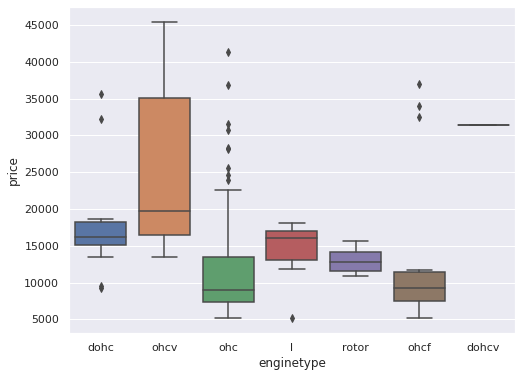

In [100]:
#Bivariate analysis
var = 'enginetype'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

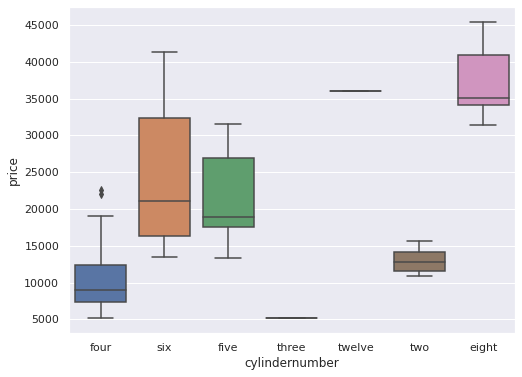

In [101]:
var = 'cylindernumber'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

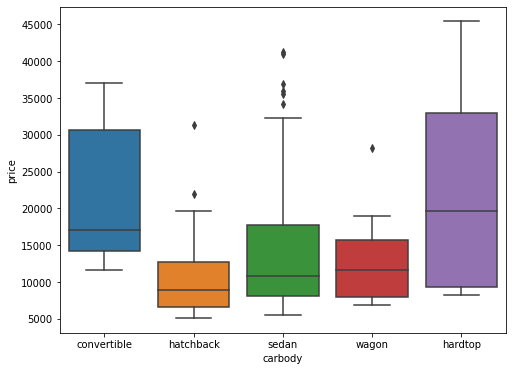

In [23]:
var = 'carbody'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

<Figure size 5760x432 with 0 Axes>

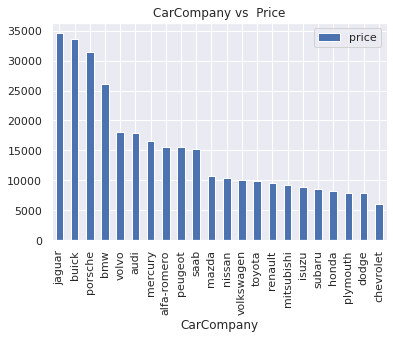

In [102]:

plt.figure(figsize=(80, 6))
df = pd.DataFrame(carinfo.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('CarCompany vs  Price')
plt.show()

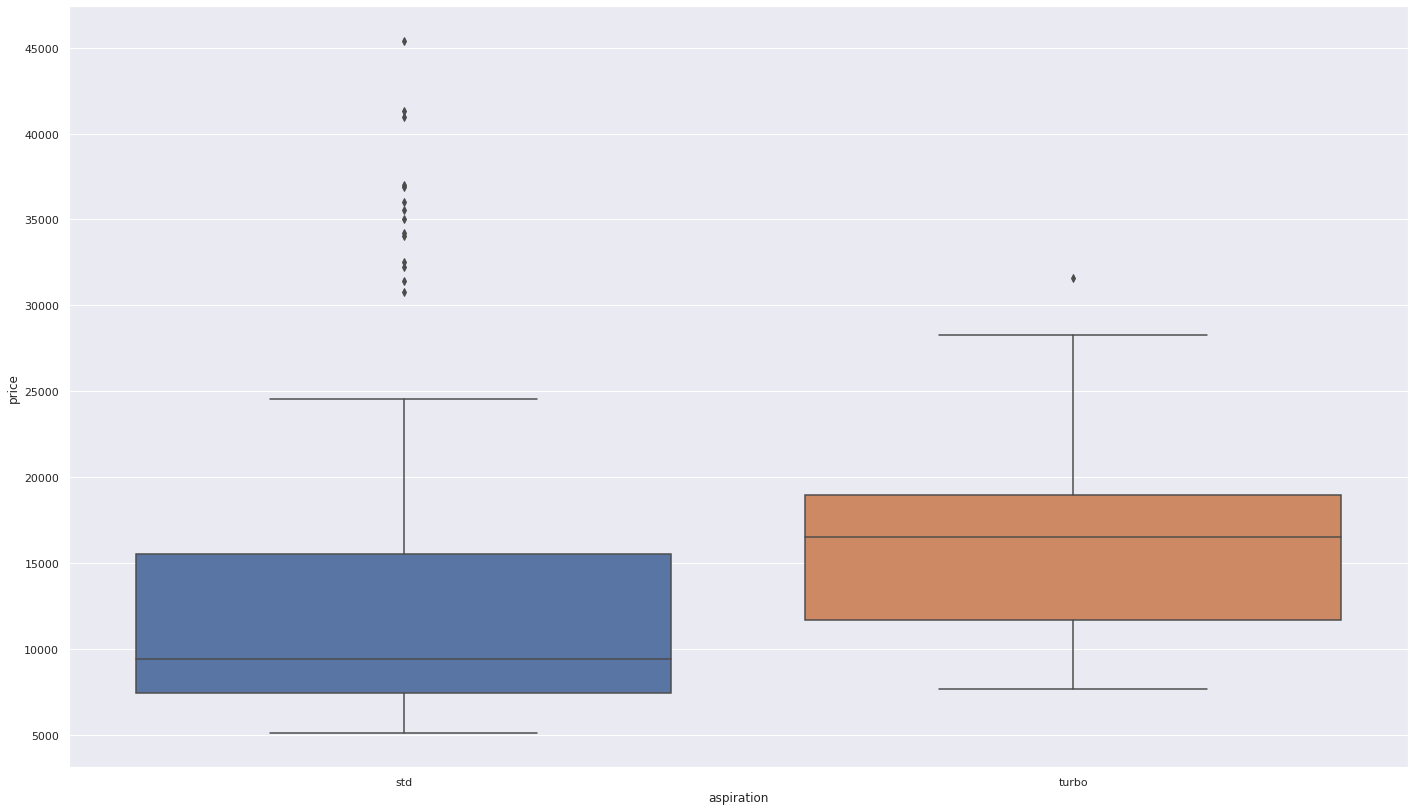

In [103]:
var = 'aspiration'
data_boxplot = pd.concat([carinfo['price'],carinfo[var]],axis=1)
f,ax = plt.subplots(figsize=(24,14))
fig = sns.boxplot(x=var,y ='price',data=data_boxplot)

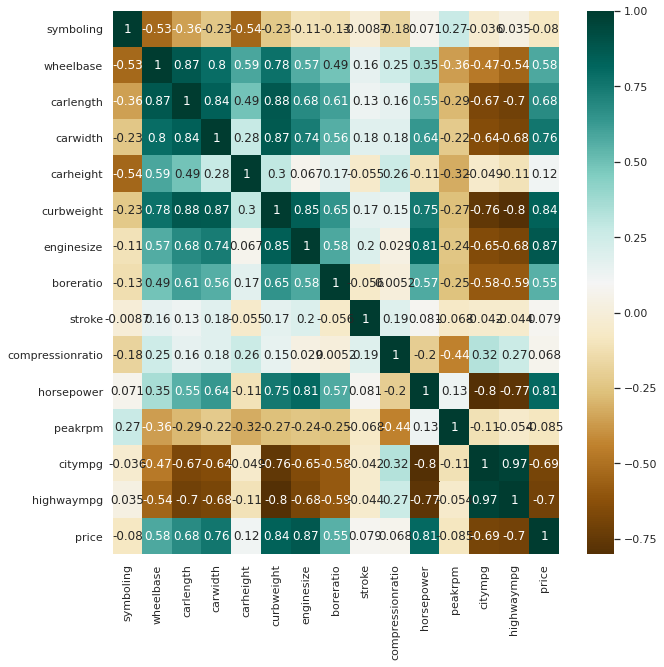

In [104]:
#HeatMap
plt.figure(figsize=(10,10))
c=carinfo.corr()
sns.heatmap(c,annot=True,cmap="BrBG")

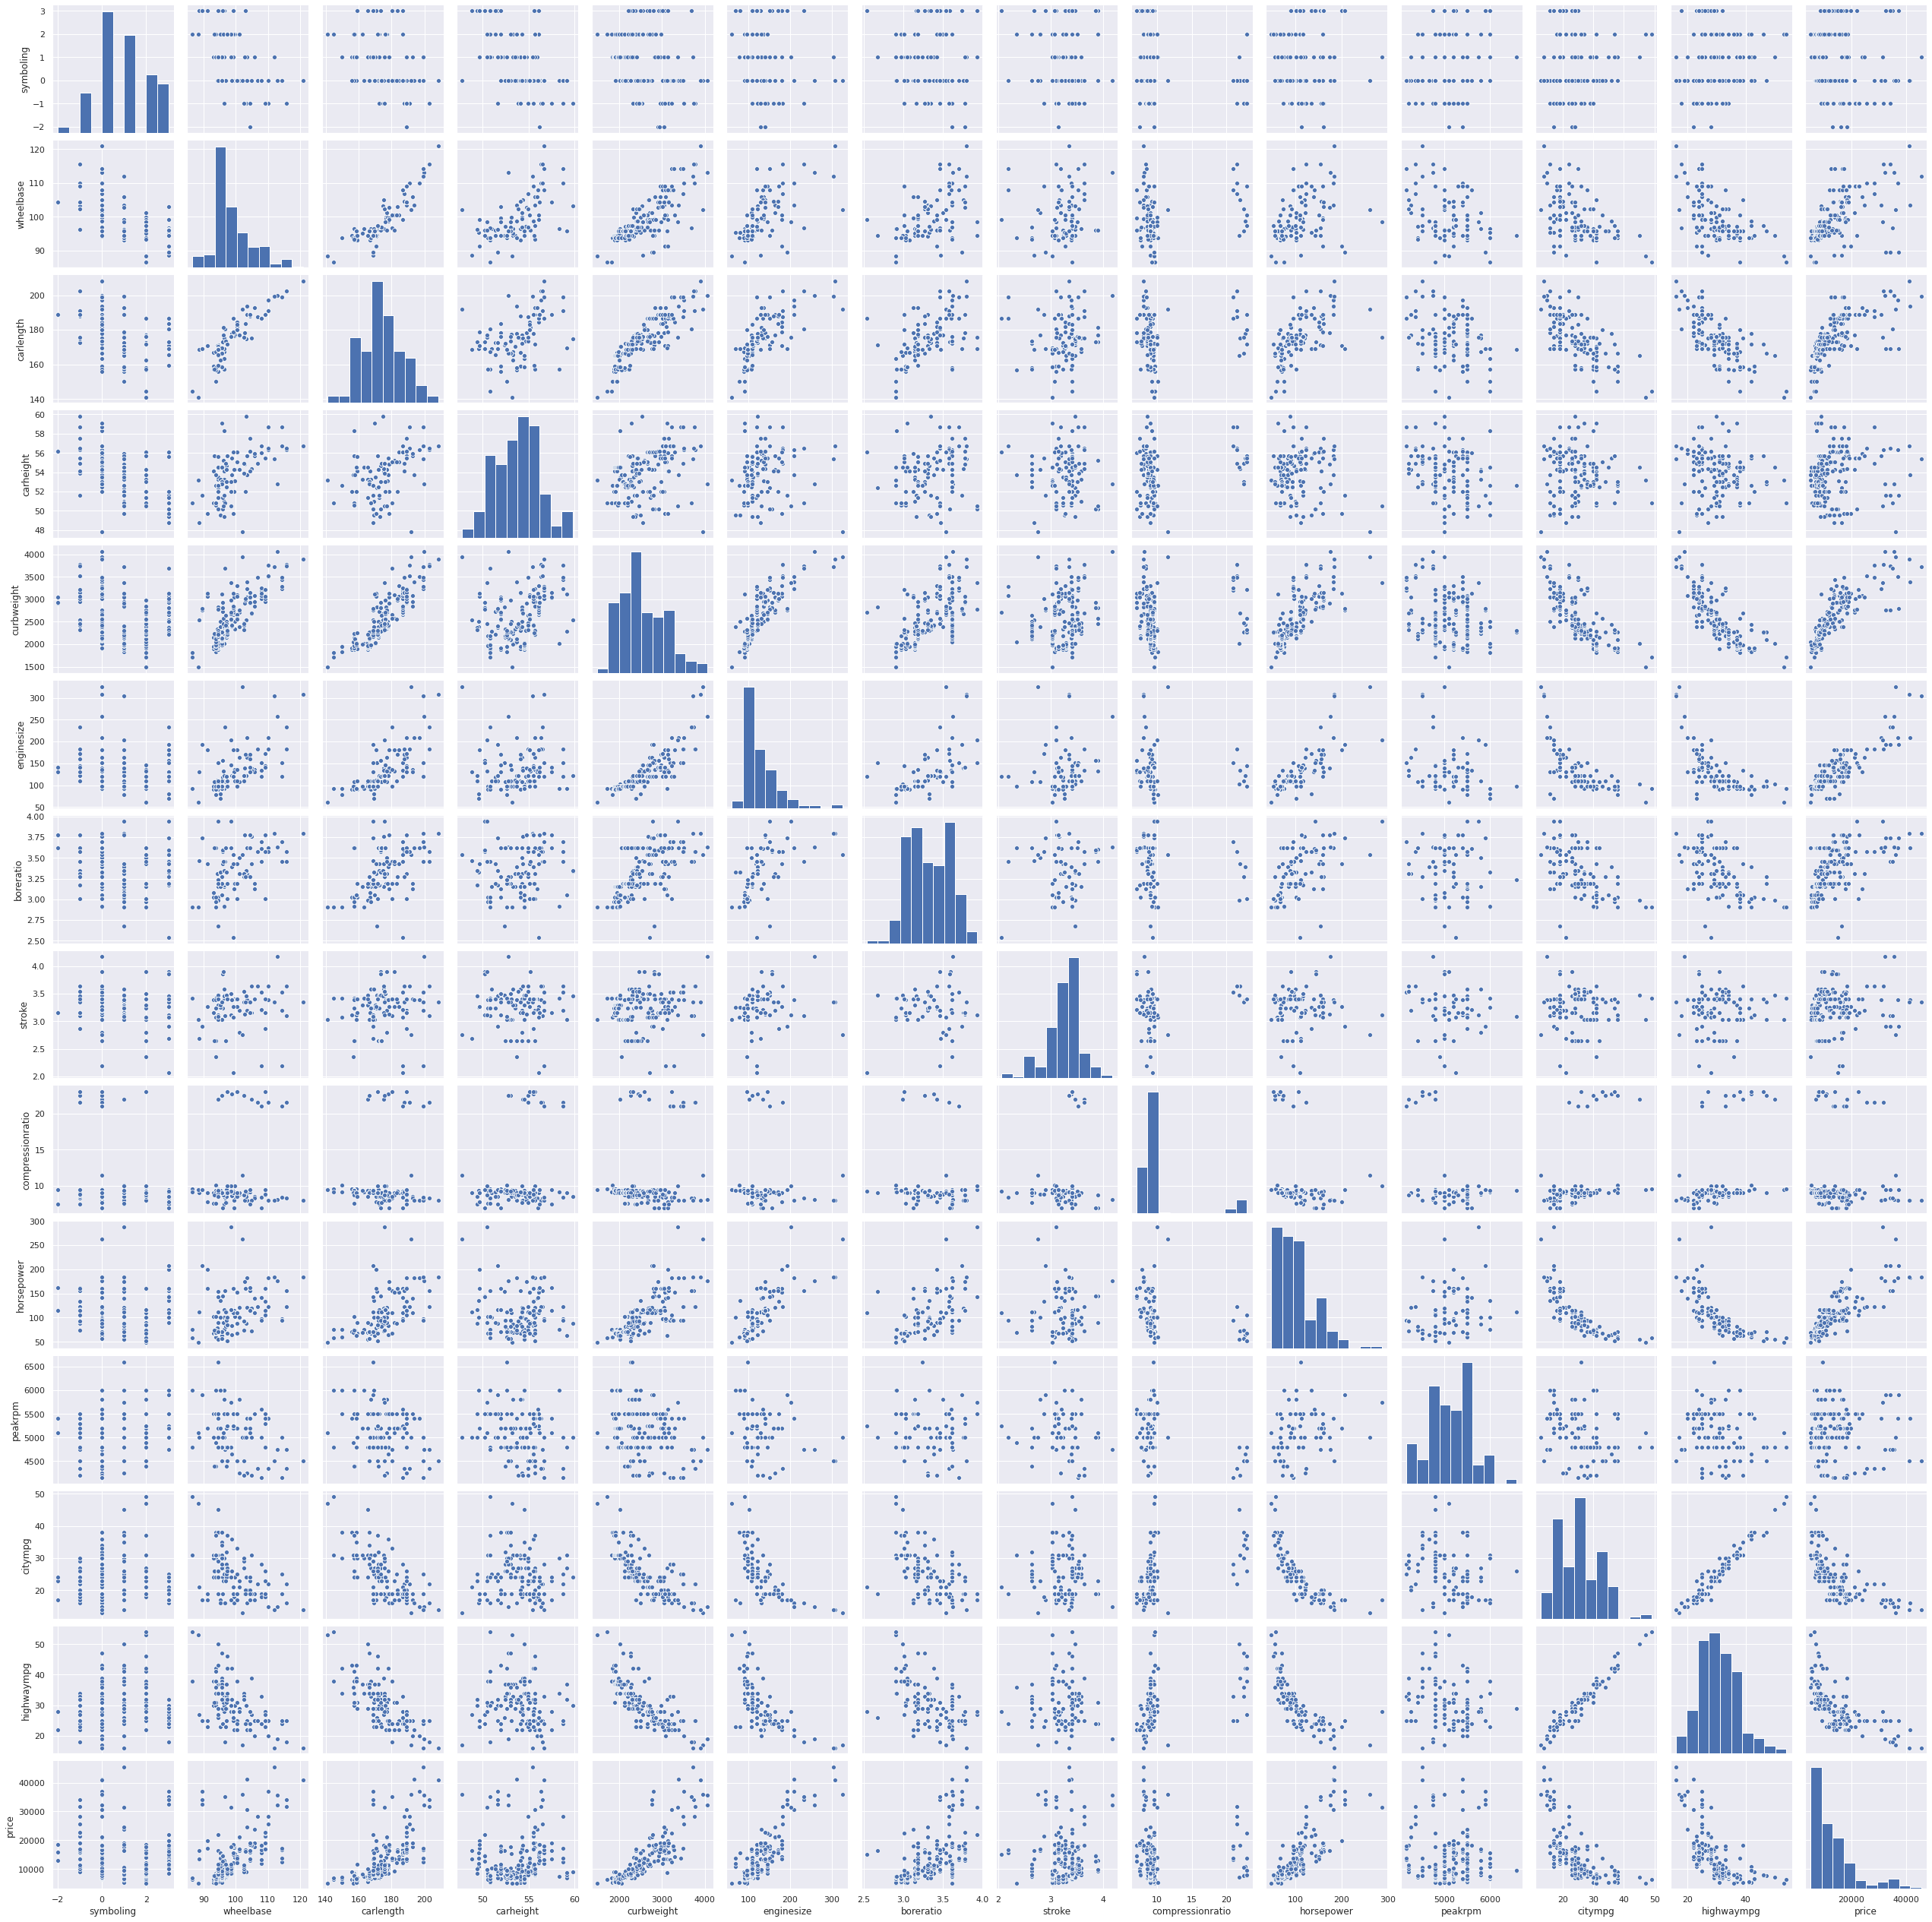

In [105]:
sns.set()
paircols = ['symboling','wheelbase','carlength','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
sns.pairplot(carinfo[paircols],size = 2.5)
plt.show()

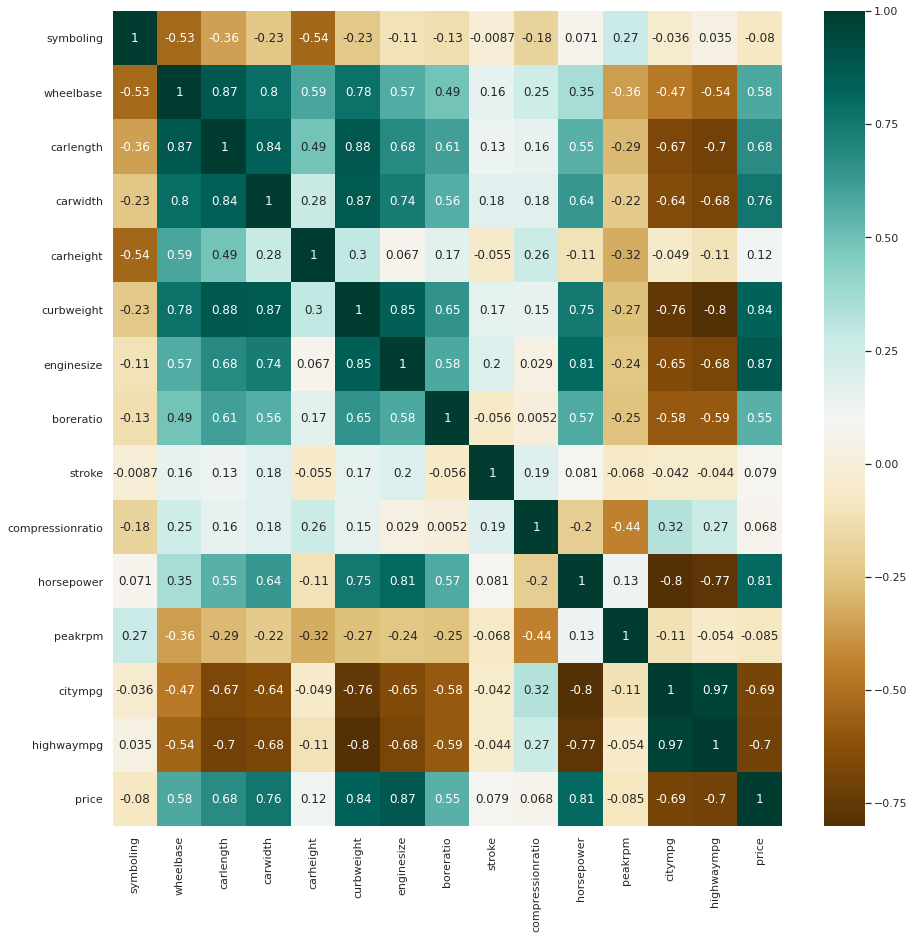

In [106]:
#HeatMap
plt.figure(figsize=(15,15))
c=carinfo.corr()
sns.heatmap(c,annot=True,cmap="BrBG")

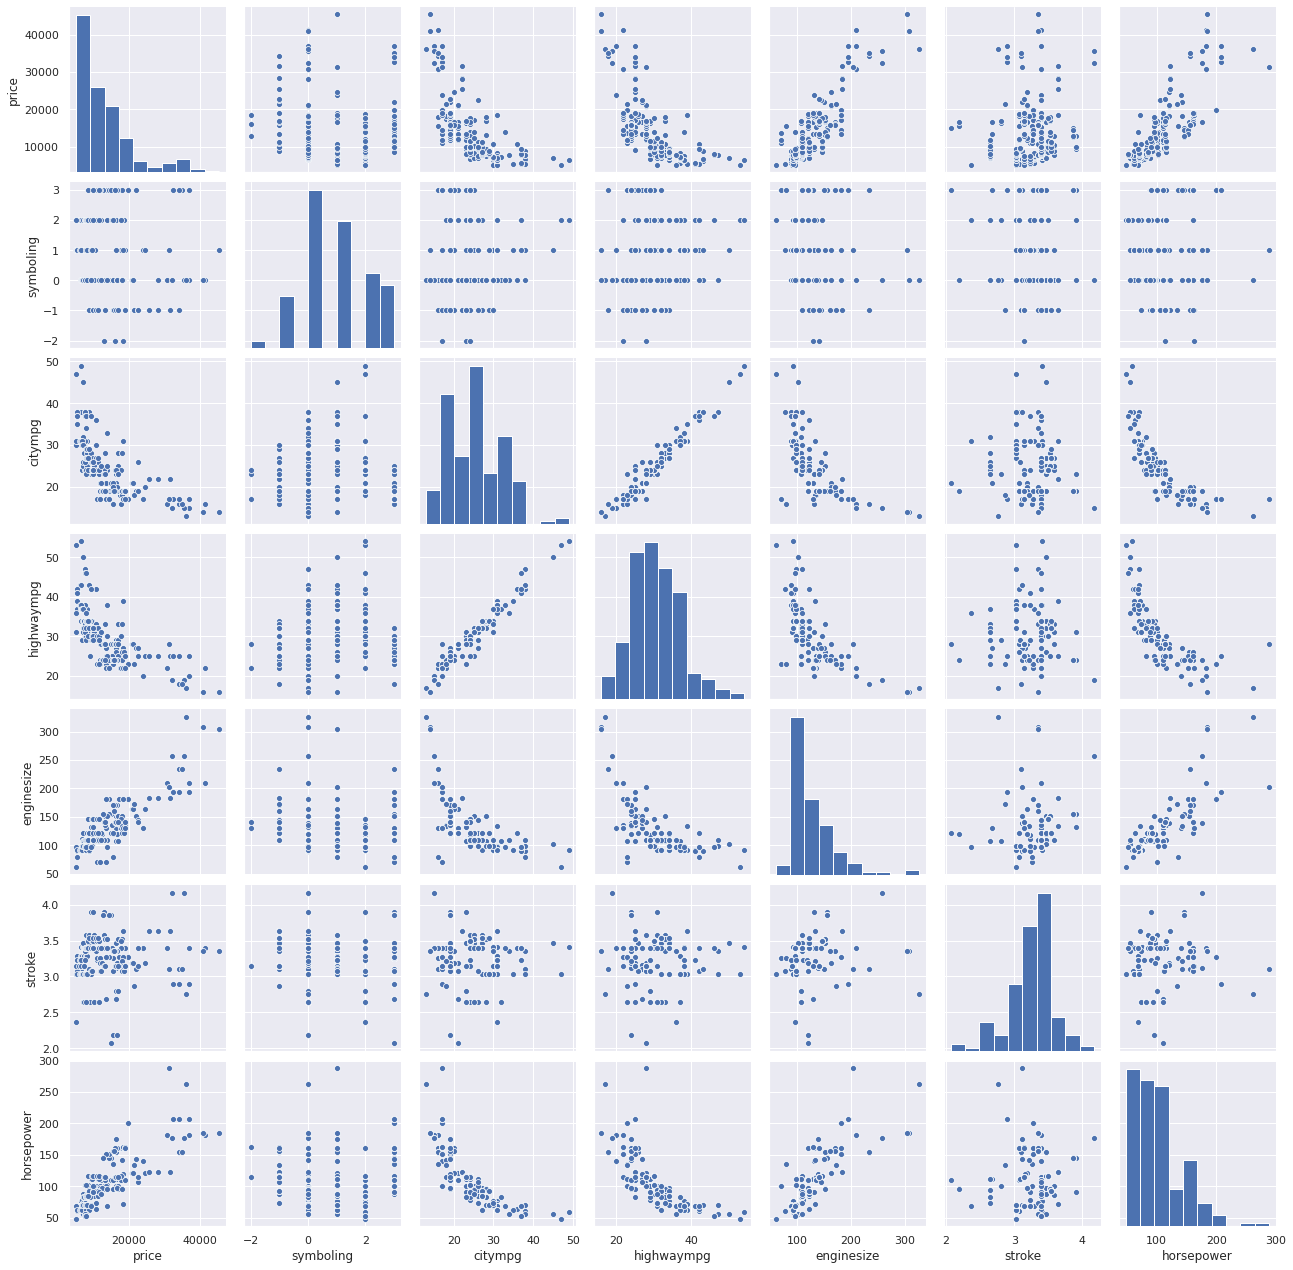

In [107]:
 sns.set()
 paircols = ['price','symboling','citympg','highwaympg','enginesize','stroke','horsepower']
 sns.pairplot(carinfo[paircols],size = 2.5)
 plt.show()

Text(0.5, 1.0, 'carlength vs Price')

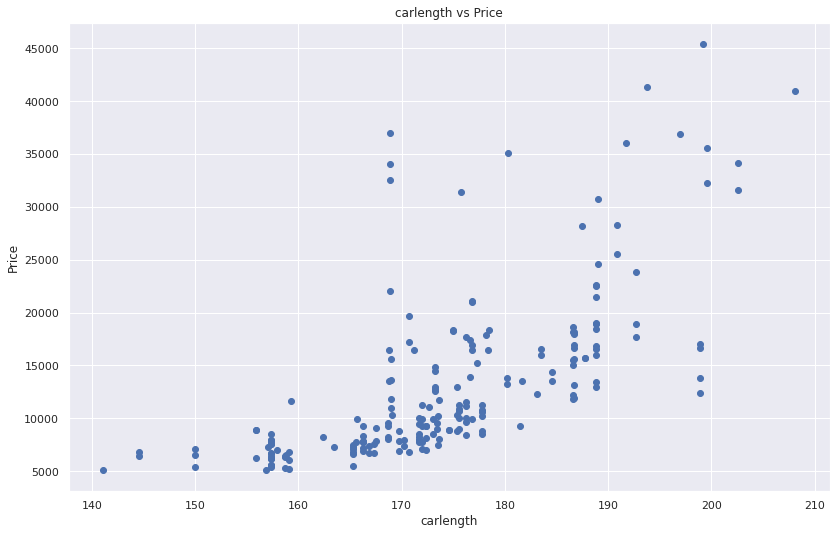

In [135]:

plt.figure(figsize=(30,50))
plt.subplot(5,2,1)
plt.scatter(carinfo['carlength'],carinfo['price'])
plt.xlabel('carlength')
plt.ylabel('Price')
plt.title('carlength vs Price')


Text(0.5, 1.0, 'carwidth vs Price')

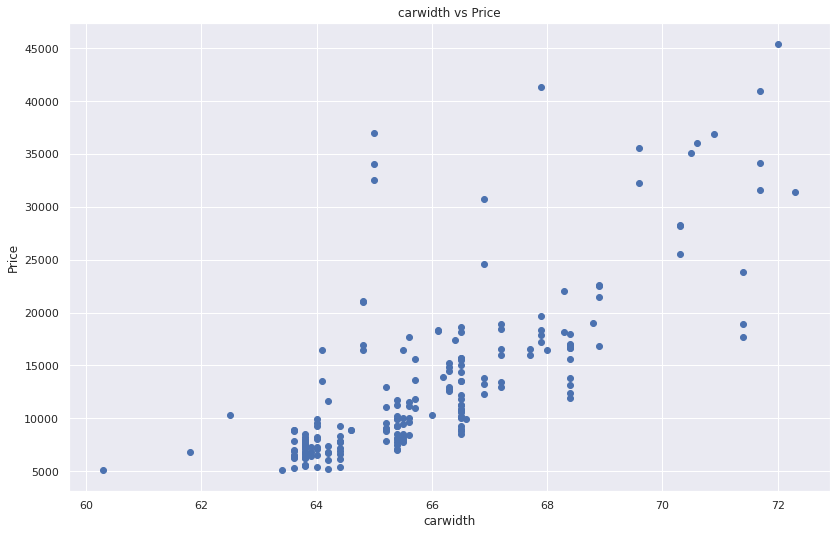

In [109]:
plt.figure(figsize=(30,50))
plt.subplot(5,2,1)
plt.scatter(carinfo['carwidth'],carinfo['price'])
plt.xlabel('carwidth')
plt.ylabel('Price')
plt.title('carwidth vs Price')

Text(0.5, 1.0, 'carlength vs Price')

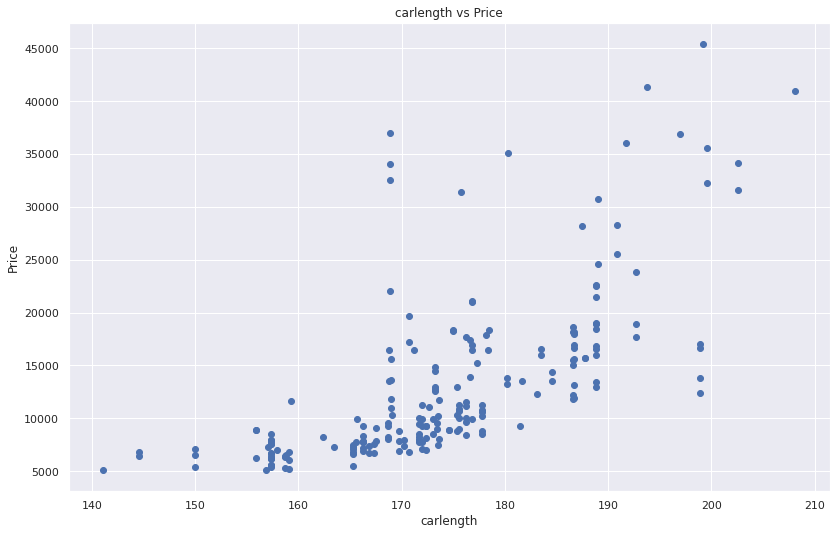

In [110]:
plt.figure(figsize=(30,50))
plt.subplot(5,2,1)
plt.scatter(carinfo['carlength'],carinfo['price'])
plt.xlabel('carlength')
plt.ylabel('Price')
plt.title('carlength vs Price')

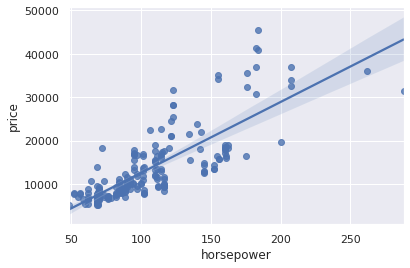

In [111]:
ax = sns.regplot(x="horsepower", y="price", data=carinfo)

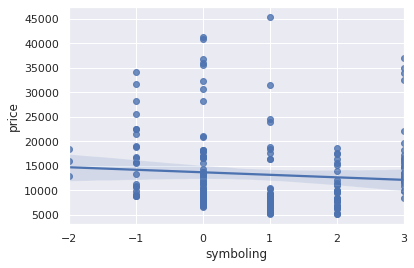

In [112]:
ax = sns.regplot(x="symboling", y="price", data=carinfo)

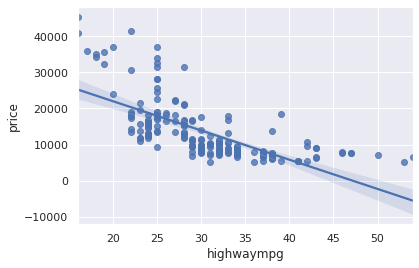

In [113]:
ax = sns.regplot(x="highwaympg", y="price", data=carinfo)

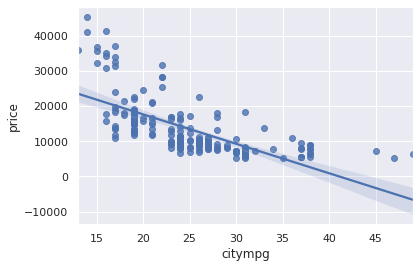

In [114]:
ax = sns.regplot(x="citympg", y="price", data=carinfo)

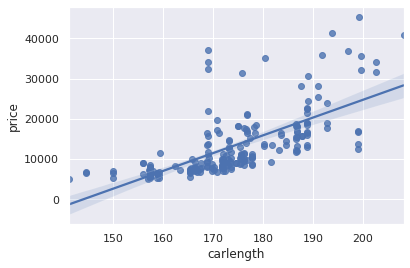

In [115]:
ax = sns.regplot(x="carlength", y="price", data=carinfo)

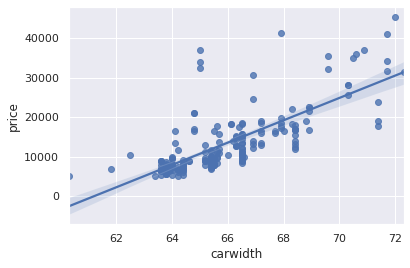

In [116]:
ax = sns.regplot(x="carwidth", y="price", data=carinfo)

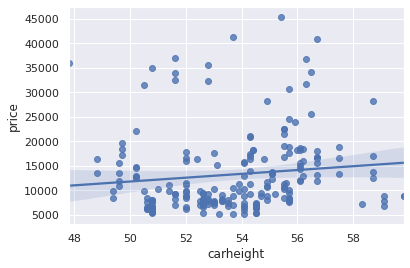

In [117]:
ax = sns.regplot(x="carheight", y="price", data=carinfo)

In [170]:
#before labelling taking the backup - Just for my self
carinfo_df = carinfo
display(carinfo_df)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [0]:
#test


In [0]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
carinfo_df['doornumber_le'] = le.fit_transform(carinfo_df['doornumber'])
carinfo_df["cylindernumber_le"] = le.fit_transform(carinfo_df["cylindernumber"])
carinfo_df['drivewheel_le'] = le.fit_transform(carinfo_df['drivewheel'])
carinfo_df['fueltype_le'] = le.fit_transform(carinfo_df['fueltype'])
carinfo_df['aspiration_le']= le.fit_transform(carinfo_df['aspiration'])
carinfo_df['enginelocation_le']= le.fit_transform(carinfo_df['enginelocation'])

In [172]:
del carinfo_df['doornumber']
del carinfo_df['fueltype'] 
del carinfo_df['fuelsystem']
del carinfo_df['aspiration'] 
del carinfo_df['enginelocation']
del carinfo_df['Model']
carinfo_df.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,2,2,1,0,0
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,2,2,1,0,0
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,3,2,1,0,0
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,2,1,1,0,0
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,1,0,1,0,0


In [0]:
#display(carinfo_df['carcompany_le'])
carinfo_df['carcompany_le']= le.fit_transform(carinfo_df['CarCompany'])
del carinfo_df['CarCompany']

In [174]:
 #One Hot Encoding
carinfo_df=pd.get_dummies(carinfo_df, columns=["carbody", "drivewheel","enginetype"], prefix=["body", "drive","enginetyp"])
carinfo_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,2,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [176]:
#del carinfo_df['enginelocation']
del carinfo_df['cylindernumber']
#del carinfo_df['drivewheel']
#del carinfo_df['carbody']
#del carinfo_df['enginetype']
#del carinfo_df['CarCompany']
carinfo_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,2,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [177]:

carinfo_df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'doornumber_le', 'cylindernumber_le', 'drivewheel_le', 'fueltype_le',
       'aspiration_le', 'enginelocation_le', 'carcompany_le',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'enginetyp_dohc',
       'enginetyp_dohcv', 'enginetyp_l', 'enginetyp_ohc', 'enginetyp_ohcf',
       'enginetyp_ohcv', 'enginetyp_rotor'],
      dtype='object')

In [0]:
#assign the feature variable, drive_4wd, in this case, to the variable X and the response variable, price, to the variable y.
#

### Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 30, test_size = 70, random_state = 100)
print(X_train.shape)
print(X_test.shape)

In [178]:
carinfo_df.shape

(205, 37)

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(carinfo_df, train_size = 0.7, random_state = 100)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
num_vars = ['carlength', 'carwidth', 'carheight', 'curbweight','enginesize','horsepower','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])		

In [151]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
122,1,93.7,0.426016,0.291667,0.265487,0.272692,0.139623,2.97,3.23,9.4,0.083333,5500,31,38,0.068818,0,2,1,1,0,0,14,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
125,3,94.5,0.452033,0.666667,0.212389,0.500388,0.339623,3.94,3.11,9.5,0.395833,5500,19,27,0.466890,1,2,2,1,0,0,15,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
166,1,94.5,0.448780,0.308333,0.424779,0.314973,0.139623,3.24,3.08,9.4,0.266667,6600,26,29,0.122110,1,2,2,1,0,0,19,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
1,3,88.6,0.450407,0.316667,0.088496,0.411171,0.260377,3.47,2.68,9.0,0.262500,5000,21,27,0.314446,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
199,-1,104.3,0.775610,0.575000,0.858407,0.647401,0.260377,3.62,3.15,7.5,0.475000,5100,17,22,0.382131,0,2,2,1,1,0,21,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [183]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,98.523077,0.525476,0.461655,0.509004,0.407878,0.241351,3.307413,3.250070,10.052587,0.227302,5130.069930,25.391608,30.874126,0.219310,0.440559,2.174825,1.293706,0.909091,0.181818,0.006993,11.811189,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,1.195999,5.961835,0.204848,0.184517,0.215378,0.211269,0.154619,0.260997,0.312529,3.794890,0.165511,481.273979,6.701939,6.973660,0.215682,0.498199,0.890598,0.567080,0.288490,0.387050,0.083624,6.259585,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,-2.000000,86.600000,0.000000,0.000000,0.000000,0.000000,0.000000,2.680000,2.190000,7.000000,0.000000,4150.000000,13.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.500000,0.399187,0.304167,0.353982,0.245539,0.135849,3.065000,3.110000,8.600000,0.091667,4800.000000,19.000000,25.000000,0.067298,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,96.500000,0.502439,0.425000,0.522124,0.355702,0.184906,3.310000,3.270000,9.000000,0.191667,5200.000000,25.000000,31.000000,0.140343,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,101.200000,0.669919,0.550000,0.668142,0.559542,0.301887,3.540000,3.400000,9.400000,0.283333,5500.000000,31.000000,36.500000,0.313479,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,115.600000,1.000000,1.000000,1.000000,1.000000,1.000000,3.940000,4.170000,23.000000,1.000000,6600.000000,49.000000,54.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


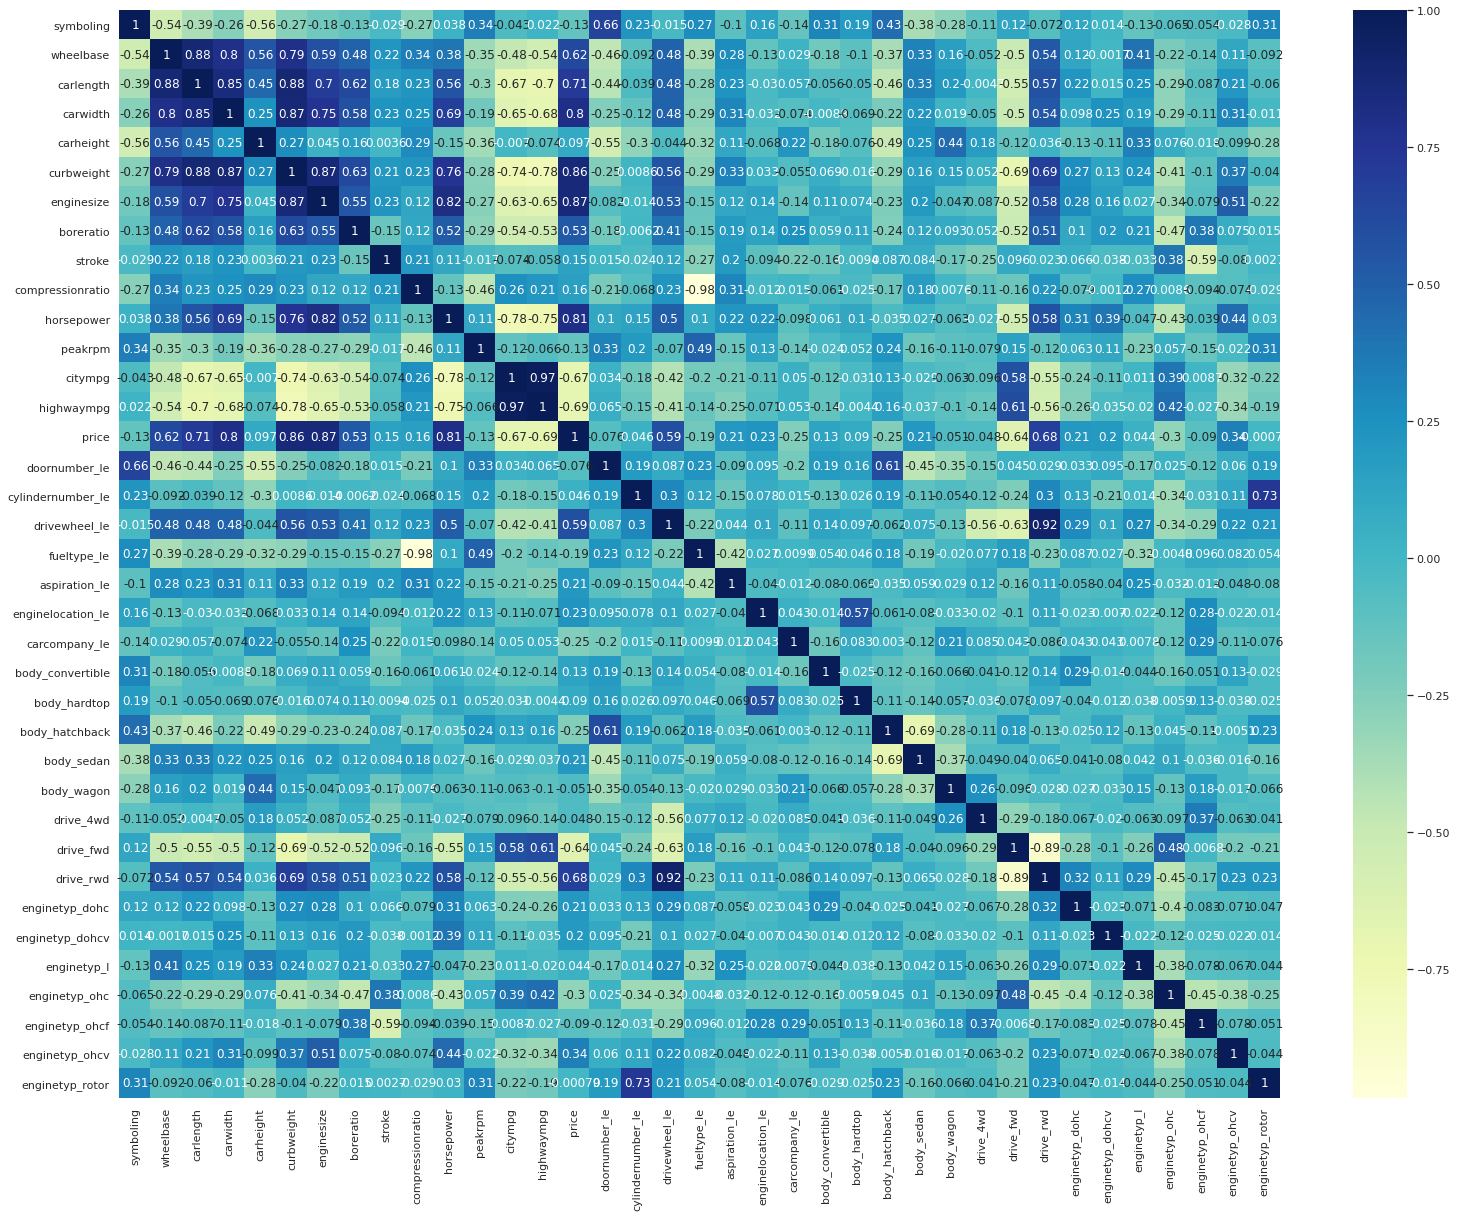

In [184]:
#training the model
plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

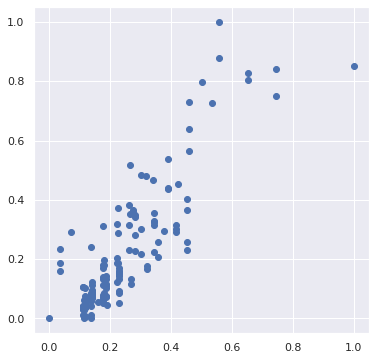

In [185]:
#engine size correlated to price
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [186]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -60205.608832
enginesize       94.941887
horsepower       52.802594
carwidth        848.698387
dtype: float64

In [187]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           8.26e-74
Time:                        15:08:45   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.0

In [188]:
#X_train = df_train
#y_train = df_train.pop('price')
print(X_train.head())
print(y_train.head())

   symboling  wheelbase  ...  enginetyp_ohcv  enginetyp_rotor
0          3       88.6  ...               0                0
1          3       88.6  ...               0                0
2          1       94.5  ...               1                0
3          2       99.8  ...               0                0
4          2       99.4  ...               0                0

[5 rows x 36 columns]
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [0]:

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train["horsepower"])

#firstmodel
lr=sm.OLS(y_train,X_train_sm)

# Fit the resgression line using 'OLS'
lr_model = lr.fit()

In [190]:
# Print the parameters, 
lr_model.params

const        -3721.761494
horsepower     163.263061
dtype: float64

In [191]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.48e-48
Time:                        15:09:40   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [192]:
#add another variable
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['enginesize', 'horsepower','carwidth']])

#firstmodel
lr=sm.OLS(y_train,X_train_sm)

# Fit the resgression line using 'OLS'
lr_model = lr.fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           8.26e-74
Time:                        15:09:46   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.0

In [74]:
#add another variable
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['enginesize','carwidth','horsepower','curbweight']])

#firstmodel
lr=sm.OLS(y_train,X_train_sm)

# Fit the resgression line using 'OLS'
lr_model = lr.fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.15e-73
Time:                        14:33:48   Log-Likelihood:                -1956.8
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.623e+04   1.28e+04     -3.610      0.0

In [193]:
#add another variable
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['enginesize','carwidth','horsepower','curbweight','carheight']])

#firstmodel
lr=sm.OLS(y_train,X_train_sm)

# Fit the resgression line using 'OLS'
lr_model = lr.fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.19e-72
Time:                        15:10:01   Log-Likelihood:                -1956.0
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     199   BIC:                             3944.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.315e+04   1.38e+04     -3.838      0.0

In [194]:
#add another variable
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['enginesize','carwidth','horsepower','curbweight','carlength']])

#firstmodel
lr=sm.OLS(y_train,X_train_sm)

# Fit the resgression line using 'OLS'
lr_model = lr.fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.01e-72
Time:                        15:10:12   Log-Likelihood:                -1956.6
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     199   BIC:                             3945.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.577e+04   1.28e+04     -3.565      0.0

In [195]:
# Check all the columns of the dataframe carinfo.columns
#carinfo_df.columns
carinfo_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,2,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [197]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params


const               -29046.195700
symboling              227.378375
wheelbase              114.887140
carlength              -30.433868
carwidth               630.068437
carheight              376.918202
curbweight               3.487518
enginesize             125.877282
boreratio            -2896.647609
stroke               -4152.871969
compressionratio      -530.976801
horsepower              14.003833
peakrpm                  1.645823
citympg                -14.676648
highwaympg             199.646224
doornumber_le         -344.791719
cylindernumber_le      -77.585989
drivewheel_le        -9141.865329
fueltype_le          -6844.335561
aspiration_le         1348.491811
enginelocation_le    10398.049029
carcompany_le         -171.611645
body_convertible     -2871.989814
body_hardtop         -6125.555171
body_hatchback       -6497.517529
body_sedan           -5973.881894
body_wagon           -7577.251292
drive_4wd           -19235.859665
drive_fwd           -10478.806740
drive_rwd     

In [198]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     74.27
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.16e-84
Time:                        15:12:04   Log-Likelihood:                -1856.1
No. Observations:                 205   AIC:                             3778.
Df Residuals:                     172   BIC:                             3888.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.905e+04   7832.38

In [0]:
#

In [0]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     46.74
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           2.34e-50
Time:                        09:09:55   Log-Likelihood:                -1292.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     110   BIC:                             2749.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.428e+04   1.05e+0

In [199]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,enginetyp_rotor,inf
27,drive_fwd,inf
25,body_wagon,inf
24,body_sedan,inf
23,body_hatchback,inf
22,body_hardtop,inf
21,body_convertible,inf
28,drive_rwd,inf
29,enginetyp_dohc,inf
16,drivewheel_le,inf


In [0]:
## Dropping highly correlated variables and insignificant variables    
X = X_train.drop(['enginetyp_rotor','body_hardtop','drivewheel_le' ,'body_hatchback','drive_rwd','body_sedan','body_wagon' ,'drive_fwd','drive_4wd','enginetyp_dohc','enginetyp_l','enginetyp_ohc','enginetyp_ohcf'], 1)
#['enginetyp_rotor','body_hardtop','drivewheel_le' ,'body_hatchback','drive_rwd','body_sedan','body_wagon' ,'drive_fwd','drive_4wd']

In [0]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [203]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     76.96
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.25e-81
Time:                        15:20:24   Log-Likelihood:                -1888.8
No. Observations:                 205   AIC:                             3826.
Df Residuals:                     181   BIC:                             3905.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.202e+04   1.66e+0

In [204]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carwidth,4911.83
1,wheelbase,2706.38
2,carlength,2426.17
4,carheight,1111.96
16,fueltype_le,840.62
9,compressionratio,606.90
13,highwaympg,597.82
12,citympg,513.99
5,curbweight,470.76
7,boreratio,365.15


In [207]:
#dropped the columns having p value > 5 values
X = X_train.drop(['enginetyp_rotor','body_hardtop','drivewheel_le' ,'body_hatchback','drive_rwd','body_sedan','body_wagon' ,'drive_fwd','drive_4wd','enginetyp_dohc','enginetyp_l','enginetyp_ohc','enginetyp_ohcf','carwidth','wheelbase','carlength','carheight' ,'fueltype_le','compressionratio','highwaympg','citympg','curbweight','boreratio','peakrpm','enginesize','stroke','horsepower','cylindernumber_le'], 1)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     19.75
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.06e-21
Time:                        15:28:41   Log-Likelihood:                -2071.9
No. Observations:                 205   AIC:                             4162.
Df Residuals:                     196   BIC:                             4192.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.622e+04   1104.05

In [208]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,doornumber_le,2.98
0,symboling,2.77
4,carcompany_le,1.57
2,aspiration_le,1.19
5,body_convertible,1.17
3,enginelocation_le,1.10
7,enginetyp_ohcv,1.06
6,enginetyp_dohcv,1.02


Text(0.5, 0, 'Errors')

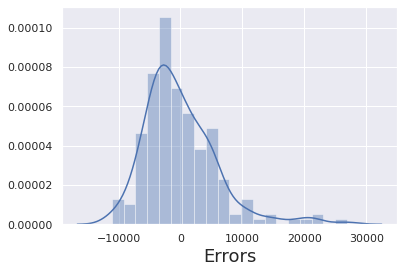

In [210]:
#Residual Analysis 
y_train_price = lr_2.predict(X_train_lm)
ig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)                   
plt.xlabel('Errors', fontsize = 18)   

In [0]:
#Step 8: Making Predictions Using the Final Model
num_vars = ['symboling','carcompany_le','enginesize','carwidth','horsepower','curbweight','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [213]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_le,cylindernumber_le,drivewheel_le,fueltype_le,aspiration_le,enginelocation_le,carcompany_le,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,enginetyp_dohc,enginetyp_dohcv,enginetyp_l,enginetyp_ohc,enginetyp_ohcf,enginetyp_ohcv,enginetyp_rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,-2.279360,99.295161,175.508065,-0.551565,54.124194,10.602487,7.398516,3.381290,3.267742,10.350000,0.176324,5113.709677,24.822581,30.467742,0.239439,0.435484,1.983871,1.403226,0.887097,0.177419,0.032258,-3.933602,0.032258,0.080645,0.338710,0.451613,0.096774,0.016129,0.564516,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.022091,6.172983,11.681726,0.000770,2.438670,1.927996,3.818343,0.287889,0.318261,4.379039,0.147963,470.626488,6.192338,6.728256,0.233076,0.499868,0.495618,0.526656,0.319058,0.385142,0.178127,0.525686,0.178127,0.274512,0.477134,0.501716,0.298064,0.127000,0.499868,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,-2.326829,86.600000,144.600000,-0.552948,49.400000,7.379167,2.761062,2.540000,2.070000,7.000000,-0.033962,4150.000000,14.000000,16.000000,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.941667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,-2.294309,95.700000,169.350000,-0.552133,52.150000,9.279167,5.327434,3.190000,3.150000,8.500000,0.048113,4800.000000,19.000000,25.000000,0.092342,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,-4.275000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,-2.278049,97.850000,174.800000,-0.551746,54.450000,10.362500,6.477876,3.390000,3.350000,9.000000,0.149057,5000.000000,24.000000,30.000000,0.158991,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,-3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,-2.261789,103.150000,185.375000,-0.551396,55.700000,12.067708,8.579646,3.620000,3.460000,9.400000,0.218868,5475.000000,29.000000,34.000000,0.317243,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,-3.441667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,-2.245528,120.900000,208.100000,-0.549263,59.800000,16.050000,23.026549,3.800000,3.900000,23.000000,0.550943,6600.000000,38.000000,47.000000,1.112855,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,-3.275000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [0]:
#y_test = df_test.pop('price')
X_test = df_test

In [225]:
#X_test_m4 = sm.add_constant(X_test)
X_test_m4.columns

Index(['const', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber_le',
       'cylindernumber_le', 'drivewheel_le', 'fueltype_le', 'aspiration_le',
       'enginelocation_le', 'carcompany_le', 'body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drive_4wd', 'drive_fwd', 'drive_rwd', 'enginetyp_dohc',
       'enginetyp_dohcv', 'enginetyp_l', 'enginetyp_ohc', 'enginetyp_ohcf',
       'enginetyp_ohcv', 'enginetyp_rotor'],
      dtype='object')

In [0]:
X_test_m4 = X_test_m4.drop(['enginetyp_rotor','body_hardtop','drivewheel_le' ,'body_hatchback','drive_rwd','body_sedan','body_wagon' ,'drive_fwd','drive_4wd','enginetyp_dohc','enginetyp_l','enginetyp_ohc','enginetyp_ohcf','carwidth','wheelbase','carlength','carheight' ,'fueltype_le','compressionratio','highwaympg','citympg','curbweight','boreratio','peakrpm','enginesize','stroke','horsepower','cylindernumber_le'], axis = 1)

In [0]:
#X_test.shape
# Adding constant variable to test dataframe
#X_test_m4 = sm.add_constant(X_test)

In [0]:
y_pred_m4 = lr_2.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

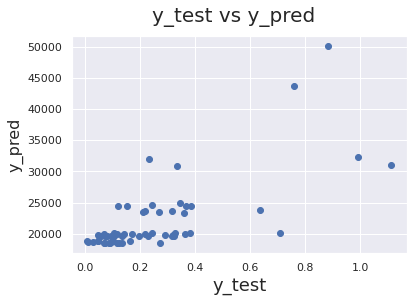

In [229]:
Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [0]:
Overall we have a ok model, but we also acknowledge that we could do better. 

We have a couple of options:
1.Add new features (drive_4wd,fwd,enginesize,length.)
2.Build a non-linear model
